# Improved Unet on ISIC

Importing libraries

In [1]:
import tensorflow as tf

In [2]:
from PIL import Image

In [3]:
from matplotlib import image
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, Dense,Dropout,UpSampling2D,concatenate, Add, LeakyReLU
from tensorflow.keras.models import Model

In [5]:
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate

In [6]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import glob

In [7]:
#ls "ISIC2018_Task1-2_Training_Data/ISIC2018_Task1_Training_GroundTruth_x2"

Loading the Data

In [8]:
data_folder = "C:/Users/s4560340/Downloads/ISIC2018_Task1-2_Training_Data/"

inputs = glob.glob(data_folder + "ISIC2018_Task1-2_Training_Input_x2/*.jpg")
inputs.sort()
labels = glob.glob(data_folder + "ISIC2018_Task1_Training_GroundTruth_x2/*.png")
labels.sort()

Resizing images to 256x256 and normalizing the images

In [9]:
a = []
b = []
for i in range(len(inputs)):
    a_ = np.asarray(Image.open(inputs[i]).resize((256,256)))/255
    a.append(a_)
    b_ = np.asarray(Image.open(labels[i]).resize((256,256)))/255
    b.append(b_)

In [10]:
print(len(a))
print(len(b))

2594
2594


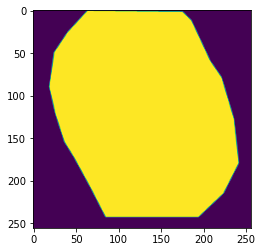

In [11]:
plt.imshow(b[45])

Splitting Data into train validation and test sets

In [12]:
length = len(a)
train_length = np.round(0.6*length)
validation_length = np.round(0.15*length)
test_length = np.round(0.25*length)

In [13]:
print(length)
print(train_length)
print(validation_length)
print(test_length)

2594
1556.0
389.0
648.0


In [14]:
train = a[0:int(train_length)]
train = np.asarray(train)
validation = a[int(train_length+1):int(train_length+validation_length+1)]
validation = np.asarray(validation)
test = a[int(train_length+validation_length):2593]
test = np.asarray(test)

In [15]:
print(length)
print(len(train))
print(len(validation))
print(len(test))

2594
1556
389
648


In [16]:
print(train.shape)
print(validation.shape)
print(test.shape)

(1556, 256, 256, 3)
(389, 256, 256, 3)
(648, 256, 256, 3)


Plotting one input image

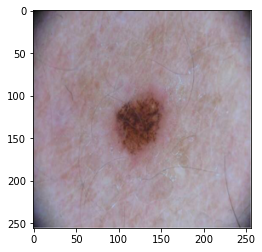

In [17]:
plt.imshow(train[9])

Splitting labels into Train Test and Validation

In [18]:
train_label = b[0:int(train_length)]
train_label = np.asarray(train_label)
validation_label = b[int(train_length+1):int(train_length+validation_length+1)]
validation_label = np.asarray(validation_label)
test_label = b[int(train_length+validation_length):2593]
test_label = np.asarray(test_label)

In [19]:
print(train_label.shape)
print(validation_label.shape)
print(test_label.shape)

(1556, 256, 256)
(389, 256, 256)
(648, 256, 256)


Adding a new axis to label data

In [20]:
train_labels = train_label[:, :, :, np.newaxis]
validation_labels = validation_label[:, :, :, np.newaxis]
test_labels = test_label[:, :, :, np.newaxis]

In [21]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(1556, 256, 256, 1)
(389, 256, 256, 1)
(648, 256, 256, 1)


In [22]:
print(train.shape)
print(validation.shape)
print(test.shape)

(1556, 256, 256, 3)
(389, 256, 256, 3)
(648, 256, 256, 3)


Plotting label images

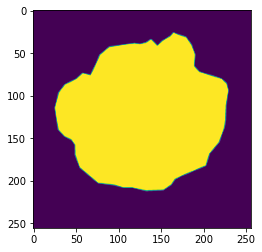

In [23]:
plt.imshow(train_labels[19])

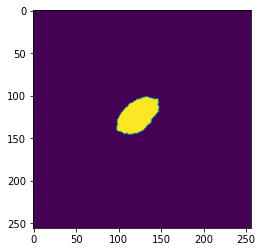

In [24]:
plt.imshow(train_labels[89])

In [25]:
train[89].shape

(256, 256, 3)

Importing the model script

In [26]:
import model_script 

In [27]:
model = model_script.improved_unet_model()

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        leaky_re_lu[0][0]                
______________________________________________________________________________________________

Compiling the model

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model

In [30]:
history = model.fit(train,train_labels,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(validation, validation_labels))

Train on 1556 samples, validate on 389 samples
Epoch 1/50
1556/1556 [==============================] - 27s 18ms/sample - loss: 0.5651 - accuracy: 0.7613 - val_loss: 0.3730 - val_accuracy: 0.8856
Epoch 2/50
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.4182 - accuracy: 0.7682 - val_loss: 0.3559 - val_accuracy: 0.8856
Epoch 3/50
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.3591 - accuracy: 0.8431 - val_loss: 0.2305 - val_accuracy: 0.9276
Epoch 4/50
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.3271 - accuracy: 0.8858 - val_loss: 0.2323 - val_accuracy: 0.9000
Epoch 5/50
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2572 - accuracy: 0.8938 - val_loss: 0.1934 - val_accuracy: 0.9232
Epoch 6/50
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2376 - accuracy: 0.9024 - val_loss: 0.2696 - val_accuracy: 0.9083
Epoch 7/50
1556/1556 [==============================] - 15s 10ms/

Plot of Training loss vs Validation loss

389/389 - 1s - loss: 0.1310 - accuracy: 0.9473


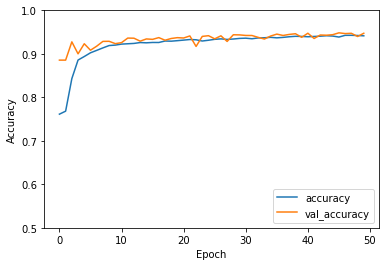

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation,  validation_labels, verbose=2)

Predicting test Data

In [32]:
prediction = model.predict(test)

In [33]:
prediction.shape

(648, 256, 256, 1)

Rounding the prediction Values

In [34]:
prediction_ = []
for i in prediction:
    prediction_.append(np.round(i))

In [35]:
prediction_

[array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]], dtype=float32),
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
       

Changing test labels from double to float 

In [36]:
tf.dtypes.cast(test_labels, tf.float32)

<tf.Tensor: shape=(648, 256, 256, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  

In [37]:
test_labels_ = tf.dtypes.cast(test_labels, tf.float32)

In [38]:
test_labels

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [39]:
test_labels_.shape

TensorShape([648, 256, 256, 1])

Plotting predicted images

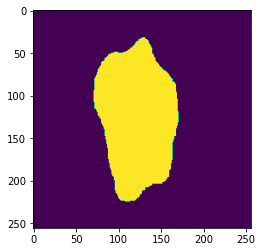

In [40]:
plt.imshow(prediction_[2][:,:,0])

Corresponding test image

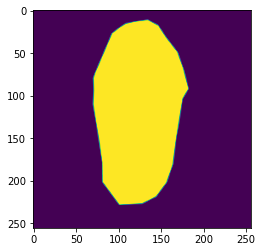

In [41]:
plt.imshow(test_labels_[2][:,:,0])

Calculating Dice Coefficient

In [42]:
from tensorflow.keras import backend as K
def dice_coef(y_true, y_pred, smooth=1):
    
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [43]:
dice_ = dice_coef(test_labels_, prediction_, smooth=1)

In [44]:
dice_

<tf.Tensor: shape=(), dtype=float32, numpy=0.83696437>